<a href="https://colab.research.google.com/github/Mustafan1/Embedded_Systems_Programming/blob/main/Copy_of_Copy_of_Introduction_to_PyTorch_Chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to PyTorch Chapter 1**
---
## Install libraries and tools

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# A small package to create visualizations of PyTorch execution graphs and traces.
# https://github.com/szagoruyko/pytorchviz
!pip install torchviz | tail -n 1
from torchviz import make_dot  # visualize the PyTorch models

# Torchinfo provides information complementary to what is provided by print(your_model) in PyTorch, 
# similar to Tensorflow's model.summary() API to view the visualization of the model,
# which is helpful while debugging your network.
# https://github.com/TylerYep/torchinfo
!pip install torchinfo | tail -n 1
from torchinfo import summary  # display the summary of PyTorch models

# Set random seed (reproduce the same results every time)
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

## **Example 5.1** Create torch.Tensor

In [ ]:
r = torch.tensor([1.0, 2.0, 3.0]).float()

print("r=", r)

print("type(r)=", type(r))

print("r.dtype=", r.dtype)

r= tensor([1., 2., 3.])
type(r)= <class 'torch.Tensor'>
r.dtype= torch.float32


## **Example 5.2** Create torch.Tensor from NumPy.array


In [ ]:
# Define NumPy.array
x_np = np.array([[1, 2, 3],
                 [4, 5, 6]])

print(x_np)

# Transform form NumPy.array to torch.Tensor
# Values ​​need to be converted to 32bit integers with dtype.toch.float32 to use machine learning libraries such as nn.Linear.
x = torch.tensor(x_np, dtype=torch.float32)

print(x.shape)
print(x)

[[1 2 3]
 [4 5 6]]
torch.Size([2, 3])
tensor([[1., 2., 3.],
        [4., 5., 6.]])


---
# AutoGrad in PyTorch
---

## **Example5.2** Automatic generation of computational graphs in PyTorch

In [ ]:
# define an array [-2, -1, 0, 1, 2]
x_np = np.arange(-2, 3, 1)
print(x_np)

x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
#x = torch.tensor(x_np, dtype=torch.float32)
print(x)

# When a variable of torch.Tensor with requires_grad=True is computed,
# the computational graph is automatically generated in the background.
y = 2 * x**2 + 1
print(y)


[-2 -1  0  1  2]
tensor([-2., -1.,  0.,  1.,  2.], requires_grad=True)
tensor([9., 3., 1., 3., 9.], grad_fn=<AddBackward0>)


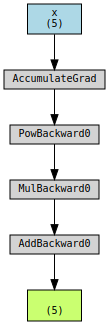

In [ ]:
from torchviz import make_dot

#show the computational graph
g = make_dot(y, params={'x': x})
display(g)

## 🤔**Exercise 5.1** Display of computational graph:

### Exercise 5.1 (1)  $y=x^3+5x^2$

tensor([-2., -1.,  0.,  1.,  2.], requires_grad=True)
tensor([12.,  4.,  0.,  6., 28.], grad_fn=<AddBackward0>)


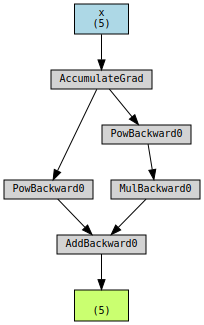

In [ ]:
x_np = np.arange(-2, 3, 1)

x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
print(x)

y = x**3 + 5 * x**2
print(y)

# Write the code to show the computation graph
g = make_dot(y, params={'x': x})
display(g)


### Exercise 5.1 (2) $y = x \log(x+3)$

tensor([-2., -1.,  0.,  1.,  2.], requires_grad=True)
tensor([-0.0000, -0.6931,  0.0000,  1.3863,  3.2189], grad_fn=<MulBackward0>)


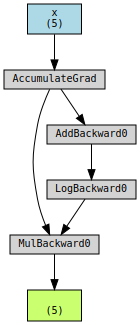

In [ ]:
x_np = np.arange(-2, 3, 1)

x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
print(x)

y = x * torch.log(x + 3)
print(y)

g = make_dot(y, params={'x': x})
display(g)
# Write the code to show the computation graph

### Exercise 5.1 (3) $y = x+\sum(e^x)$

tensor([-2., -1.,  0.,  1.,  2.], requires_grad=True)
tensor([ 9.6106, 10.6106, 11.6106, 12.6106, 13.6106], grad_fn=<AddBackward0>)


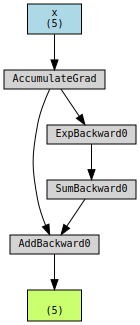

In [ ]:
x_np = np.arange(-2, 3, 1)

x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
print(x)

y = x + torch.sum(torch.exp(x))
print(y)


g = make_dot(y, params={'x': x})
display(g)
# Write the code to show the computation graph

## **Example5.4** AutoGrad in PyTorch

In [ ]:
x_np = np.arange(-2, 3, 1)
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
y = 2 * x**2 + 1
print(y)


# The output z must be a scalar value to compute the gradient using backward().
# Then, y.sum() function is used to provide a scalar value.
z = y.sum()
print(z)

print("x.grad=", x.grad) # dx/dz has not calculated yet
z.backward()
print("x.grad=", x.grad) # dx/dz has calculated by z.backward()

tensor([9., 3., 1., 3., 9.], grad_fn=<AddBackward0>)
tensor(25., grad_fn=<SumBackward0>)
x.grad= None
x.grad= tensor([-8., -4.,  0.,  4.,  8.])


## 🤔 **Exercise 5.2** Calculate grads

### Exercise 5.2 (1)  $y=x^3+5x^2$

In [ ]:
x_np = np.arange(-2, 3, 1)
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
print(x)

# write the code HERE
y = x**3 + 5 * x**2
print("y = ", y)

z = y.sum()
z.backward()
print("x.grad=", x.grad)

tensor([-2., -1.,  0.,  1.,  2.], requires_grad=True)
y =  tensor([12.,  4.,  0.,  6., 28.], grad_fn=<AddBackward0>)
x.grad= tensor([-8., -7.,  0., 13., 32.])


### Exercise 5.2 (2) $y = x \log(x+3)$

In [ ]:
x_np = np.arange(-2, 3, 1)
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
print(x)

# write the code HERE
y = x* torch.log(x + 3)
print("y = ", y)

z = y.sum()
z.backward()
print("x.grad=", x.grad)

tensor([-2., -1.,  0.,  1.,  2.], requires_grad=True)
y =  tensor([-0.0000, -0.6931,  0.0000,  1.3863,  3.2189], grad_fn=<MulBackward0>)
x.grad= tensor([-2.0000,  0.1931,  1.0986,  1.6363,  2.0094])


### Exercise 5.2 (3) $y = x+\sum(e^x)$

In [ ]:
x_np = np.arange(-2, 3, 1)
x = torch.tensor(x_np, requires_grad=True, dtype=torch.float32)
print(x)

# write the code HERE
y = x + torch.sum(torch.exp(x))
print("y = ", y)

z = y.sum()
z.backward()
print("x.grad=", x.grad)

tensor([-2., -1.,  0.,  1.,  2.], requires_grad=True)
y =  tensor([ 9.6106, 10.6106, 11.6106, 12.6106, 13.6106], grad_fn=<AddBackward0>)
x.grad= tensor([ 1.6767,  2.8394,  6.0000, 14.5914, 37.9453])


---
# **Using GPU with PyTorch**
---

In [ ]:
# Device allocation
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
x_np = np.array([1, 2, 3, 4, 5])  
y_np = np.array([5, 4, 3, 2, 1])
x = torch.tensor(x_np, dtype=torch.float32) # variable x is allocated on CPU
y = torch.tensor(y_np, dtype=torch.float32) # variable y is allocated on CPU

z = x * y  # this calcuration executes on CPU
print(z)

tensor([5., 8., 9., 8., 5.])


In [ ]:
x_gpu = x.to(device)  # variable x_gpu is allocated on GPU
y_gpu = y.to(device)  # variable y_gpu is allocated on GPU

z_gpu = x_gpu * y_gpu  # this calcuration executes on GPU
print(z_gpu)

tensor([5., 8., 9., 8., 5.], device='cuda:0')


In [ ]:
x * y_gpu  # x is on CPU, y_gpu is on GPU 
           # Error occur because variables on the CPU and variables on the GPU cannot be calculated

RuntimeError: ignored

---
# **Multiclass classfication using PyTorch (1)  -Iris dataset-**
---

## **Example 5.5** Preparation for Iris dataset 

In [ ]:
#import libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris() #load dataset
# print(iris.DESCR)  # Show the description of Iris dataset

# input data and its labels
x_org = iris.data
t = iris.target

# Here, we only use sepal_length (x_org[:, 0]) and petal_length (x_org[:, 2]) as input data
x = x_org[:,[0,2]]


# Divide into training data and test data and shuffle
x_train, x_test, t_train, t_test = train_test_split(x, t, train_size=100, test_size=50, random_state=1234)

print("x_train.shape=", x_train.shape)
print("t_train.shape=", t_train.shape)
print("x_test.shape=", x_test.shape)
print("t_test.shape=", t_test.shape)

x_train.shape= (100, 2)
t_train.shape= (100,)
x_test.shape= (50, 2)
t_test.shape= (50,)


## **Example 5.6** Visualize the dataset

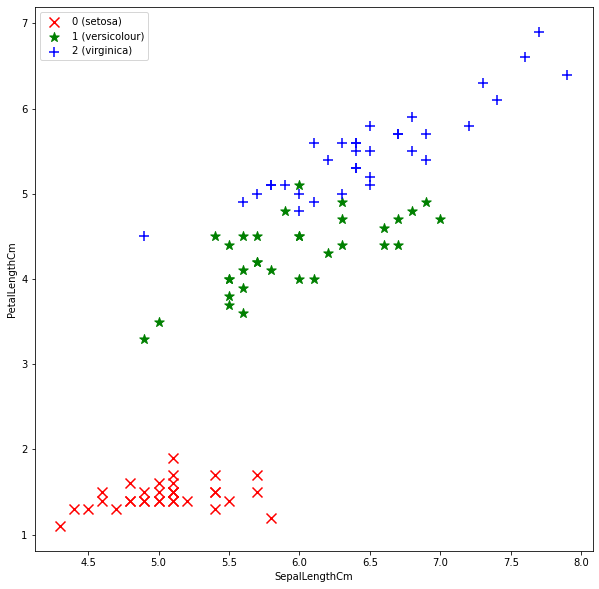

In [ ]:
import matplotlib.pyplot as plt

# Split x_train by labels
x_t0 = x_train[t_train == 0]
x_t1 = x_train[t_train == 1]
x_t2 = x_train[t_train == 2]

# Show scatterplot
plt.figure(figsize=(10, 10))
plt.scatter(x_t0[:,0], x_t0[:,1], marker='x', c='r', s=100, label='0 (setosa)')
plt.scatter(x_t1[:,0], x_t1[:,1], marker='*', c='g', s=100, label='1 (versicolour)')
plt.scatter(x_t2[:,0], x_t2[:,1], marker='+', c='b', s=100, label='2 (virginica)')
plt.xlabel('SepalLengthCm')
plt.ylabel('PetalLengthCm')
plt.legend()
plt.show()

## **Example 5.7** Neural network model

In [ ]:
# Device allocation
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [ ]:
# model definition
# 2-input, 3-outpupt logistic regression model

class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        # Define Linear layer
        # see https://pytorch.org/docs/stable/generated/torch.nn.Linear.html
        input_size = 2    # input dimension
        output_size = 3   # output dimension (the number of classes)
        self.linear1 = nn.Linear(input_size, output_size, bias=True)
                
        # Initialize weights and biases
        # see https://pytorch.org/docs/stable/nn.init.html
        torch.nn.init.normal_(self.linear1.weight, 0.0, 1.0) # mean=0.0, std=1.0
        torch.nn.init.zeros_(self.linear1.bias)

    def forward(self, x):
        y = self.linear1(x)
        return y

net = Model1()    # instantiation
net = net.to(device)                     # send the model to device(GPU or CPU)

## **Example 5.8** Check parameter and network structure

In [ ]:
# parameter checking
# l1.weight is a matrix (2-rank tensor),
# l1.bias is a vector (1-rank tensor)

for parameter in net.named_parameters():
    print(parameter)

In [ ]:
summary(net, (2,)) # display model sammary

Layer (type:depth-idx)                   Output Shape              Param #
Model1                                   [3]                       --
├─Linear: 1-1                            [3]                       9
Total params: 9
Trainable params: 9
Non-trainable params: 0
Total mult-adds (M): 0.00
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00

## **Example 5.9 Criterion (Loss function) and optimizer**

In [ ]:
# transform from np.ndarray to torch.Tensor and send to device
train_inputs = torch.tensor(x_train).float().to(device)
train_labels = torch.tensor(t_train).long().to(device)
test_inputs = torch.tensor(x_test).float().to(device)
test_labels = torch.tensor(t_test).long().to(device)

# Loss: Sortmax with Cross-entropy
# https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html
criterion = nn.CrossEntropyLoss()

# SDG (stochastic gradient descent)
# https://pytorch.org/docs/stable/generated/torch.optim.SGD.html
optimizer = optim.SGD(net.parameters(), lr=0.01)  #learning rate lr = 0.01

## **Example5.10 Show the calculation graph**

In [ ]:
# Calculate loss once to display the calculation graph.
outputs = net(train_inputs)     # prediction
loss = criterion(outputs, train_labels)  # calculate loss

# display calculation graph
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

NameError: ignored

## **Example 5.11 Learning loop**

In [ ]:
Epoch = 1000         # the number of epochs
loss_history = []

# learning loop
for i in range(Epoch):

    # learning phase using training data
    optimizer.zero_grad()  # initialize gradient 

    outputs = net(train_inputs)             # [Step1] calculate outputs (forward calculation)
    loss = criterion(outputs, train_labels) # [Step2] loss calculation
    loss.backward()                         # [Step3] calculate gradients (backcward propagation)
    optimizer.step()                        # [Step4] parameter update
    loss_history.append(loss.item())                   # record current loss

# draw the loss graph
plt.plot(loss_history)
plt.ylabel("Loss")
plt.show()

# calculate accuracy with test dataset
test_outputs = net(test_inputs)  # calculate outputs (forward calculation)
test_predicted = torch.max(test_outputs, 1)[1] # Label extraction from outputs
test_acc =  (test_predicted == test_labels).sum() / len(test_labels)
print("test_acc=\n", test_acc)
    

NameError: ignored

## 🤔 **Exercise 5.3**
Create a classification model in PyTorch with all four features of the Iris dataset. Show the estimation accuracy after learning.


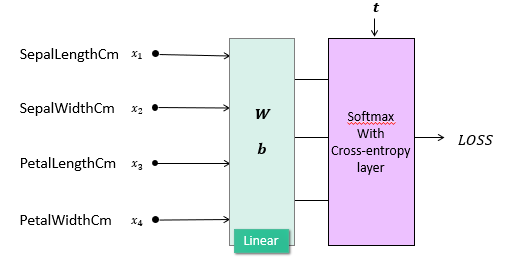

In [ ]:
x_train, x_test, t_train, t_test = train_test_split(x_org, t, train_size=100, test_size=50, random_state=1234)


# model definition
class Model_Exercise5_3(nn.Module):
    def __init__(self):
        super().__init__()
        input_size = 4    # use 4 features
        output_size = 3   # output dimension (the number of classes)
        self.linear1 = nn.Linear(input_size, output_size, bias=True)
                
        # Initialize weights and biases
        torch.nn.init.normal_(self.linear1.weight, 0.0, 1.0) # mean=0.0, std=1.0
        torch.nn.init.zeros_(self.linear1.bias)

    def forward(self, x):
        y = self.linear1(x)
        return y

net = Model_Exercise5_3()    # instantiation
net = net.to(device)         # send the model to device(GPU or CPU)


# transform from np.ndarray to torch.Tensor and send to device
train_inputs = torch.tensor(x_train).float().to(device)
train_labels = torch.tensor(t_train).long().to(device)
test_inputs = torch.tensor(x_test).float().to(device)
test_labels = torch.tensor(t_test).long().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.01)


# learning loop
for i in range(Epoch):

    # learning phase using training data
    optimizer.zero_grad()  # initialize gradient 

    outputs = net(train_inputs)             # [Step1] calculate outputs (forward calculation)
    loss = criterion(outputs, train_labels) # [Step2] loss calculation
    loss.backward()                         # [Step3] calculate gradients (backcward propagation)
    optimizer.step()                        # [Step4] parameter update
    loss_history.append(loss.item())                   # record current loss

# draw the loss graph
plt.plot(loss_history)
plt.ylabel("Loss")
plt.show()

# calculate accuracy with test dataset
test_outputs = net(test_inputs)  # calculate outputs (forward calculation)
test_predicted = torch.max(test_outputs, 1)[1] # Label extraction from outputs
test_acc =  (test_predicted == test_labels).sum() / len(test_labels)
print("test_acc=\n", test_acc)

NameError: ignored

## 🤔 **Exercise 5.4**
Create a classification model of 3-layer neural network as follows in PyTorch.
Show the estimation accuracy after learning.


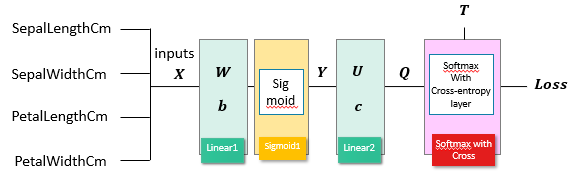

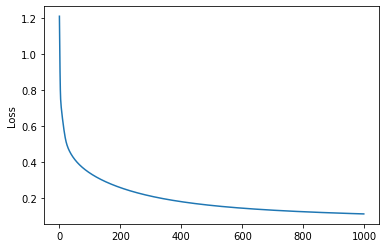

test_acc=
 tensor(0.9800, device='cuda:0')


In [ ]:
x_train, x_test, t_train, t_test = train_test_split(x_org, t, train_size=100, test_size=50, random_state=1234)


# model definition
class Model_Exercise5_4(nn.Module):
    def __init__(self):
        super().__init__()
        input_size = 4    # use 4 features
        hidden_size = 5
        output_size = 3   # output dimension (the number of classes)
        self.linear1 = nn.Linear(input_size, hidden_size, bias=True)
        self.linear2 = nn.Linear(hidden_size, output_size, bias=True)
        self.sigmoid = nn.Sigmoid()
                
        # Initialize weights and biases
        torch.nn.init.normal_(self.linear1.weight, 0.0, 1.0) # mean=0.0, std=1.0
        torch.nn.init.zeros_(self.linear1.bias)
        torch.nn.init.normal_(self.linear2.weight, 0.0, 1.0) # mean=0.0, std=1.0
        torch.nn.init.zeros_(self.linear2.bias)

    def forward(self, x):
        p = self.linear1(x)
        q = self.sigmoid(p)
        y = self.linear2(q)
        return y

net = Model_Exercise5_4()    # instantiation
net = net.to(device)         # send the model to device(GPU or CPU)


# transform from np.ndarray to torch.Tensor and send to device
train_inputs = torch.tensor(x_train).float().to(device)
train_labels = torch.tensor(t_train).long().to(device)
test_inputs = torch.tensor(x_test).float().to(device)
test_labels = torch.tensor(t_test).long().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.1)


# learning loop
for i in range(Epoch):

    # learning phase using training data
    optimizer.zero_grad()  # initialize gradient 

    outputs = net(train_inputs)             # [Step1] calculate outputs (forward calculation)
    loss = criterion(outputs, train_labels) # [Step2] loss calculation
    loss.backward()                         # [Step3] calculate gradients (backcward propagation)
    optimizer.step()                        # [Step4] parameter update
    loss_history.append(loss.item())                   # record current loss

# draw the loss graph
plt.plot(loss_history)
plt.ylabel("Loss")
plt.show()

# calculate accuracy with test dataset
test_outputs = net(test_inputs)  # calculate outputs (forward calculation)
test_predicted = torch.max(test_outputs, 1)[1] # Label extraction from outputs
test_acc =  (test_predicted == test_labels).sum() / len(test_labels)
print("test_acc=\n", test_acc)

---
# **Multiclass classfication using PyTorch (2)  -MNIST dataset-**
---

## **Example 5.12 Data Preparation (1) dataset loading and preprocessing using Transforms**

In [ ]:
import torchvision.datasets as datasets         # for using MNIST dataset
import torchvision.transforms as transforms     # Transforms

data_root = './data'  # Download destination folder

# preprocessing function (Transforms)
transform = transforms.Compose([
    # ToTensor method transforms from PIL Image or numpy.ndarrya to torch.Tensor.
    # It also normalizes from [0, 255] integer values to [0.0, 1.0] float values.
    # see https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html
    transforms.ToTensor(),

    # serialize (convert to 1st order tensor)
    transforms.Lambda(lambda x: x.view(-1)), 
])

# training dataset
train_set = datasets.MNIST(root = data_root, train = True, download = True, transform = transform)
# test dataset
test_set = datasets.MNIST(root = data_root, train = False, download = True, transform = transform)

print(train_set.data.shape)
print(test_set.data.shape)

# check the results of transforms
image, label = train_set[0]
print('type of inputdata: ', type(image))
print('shpae of inputdata: ', image.shape)
print('minimum value: ', image.data.min())
print('maximum value: ', image.data.max())

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw

torch.Size([60000, 28, 28])
torch.Size([10000, 28, 28])
type of inputdata:  <class 'torch.Tensor'>
shpae of inputdata:  torch.Size([784])
minimum value:  tensor(0.)
maximum value:  tensor(1.)


## **Example 5.13 Data preparation (2) Making minibatch with DataLoader**

In [ ]:
from torch.utils.data import DataLoader

batch_size = 100  #minibatch size

# DataLoader for training data (with shuffle)
train_loader = DataLoader( train_set, batch_size = batch_size, shuffle = True)

# DataLoader for test data (without shuffle)
test_loader = DataLoader( test_set,  batch_size = batch_size, shuffle = False) 

## Device allocation
No need to run if run once before

In [ ]:
# Device allocation
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


## **Example 5.15 Network model definition**

In [ ]:
# 3-layer neural network 
class Model2(nn.Module):
    def __init__(self):
        super().__init__()
        input_size = 784  # input dimension = 784
        hidden_size = 20  # hidden size is a hyper parameter
        output_size = 10  # output dimension = 10 (the number of classes)
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)
        self.mse = nn.Sigmoid()
        # inplace = If set to True, the variable will be overwritten directly to save memory.
        #self.relu = nn.ReLU(inplace=True)　# Use ReLU

        # Initialize weights and biases
        torch.nn.init.normal_(self.linear1.weight, 0.0, 1.0) # mean=0.0, std=1.0
        torch.nn.init.zeros_(self.linear1.bias)
        torch.nn.init.normal_(self.linear2.weight, 0.0, 1.0) # mean=0.0, std=1.0
        torch.nn.init.zeros_(self.linear2.bias)
   
    def forward(self, x):
        p = self.linear1(x)
        y = self.mse(p)
        #y = self.relu(p)
        q = self.linear2(y)
        return q

net = Model2() # make model instance
net = net.to(device) # Send the model to GPU

# Loss: Sortmax with Cross-entropy
criterion = nn.CrossEntropyLoss()

# SDG (stochastic gradient descent)
optimizer = optim.SGD(net.parameters(), lr=0.01)  #lr = learning rate

In [ ]:
# show parameters (l1.weight, l1.bias, l2.weight, l2.bias)
for parameter in net.named_parameters():
    print(parameter)

('linear1.weight', Parameter containing:
tensor([[ 0.0551,  1.0136,  0.4527,  ...,  0.2699, -0.9586,  2.1563],
        [ 1.4091,  1.4350, -0.0601,  ..., -0.6482,  1.2879,  1.0935],
        [ 0.9771,  0.6717,  0.4753,  ..., -1.1915,  0.7681,  0.8610],
        ...,
        [ 0.6423, -0.3688, -0.9413,  ..., -0.9696, -0.7416, -0.5583],
        [ 1.1632,  1.5189,  2.2214,  ...,  0.8311, -1.7452, -1.5206],
        [-1.1962,  0.1405, -1.1463,  ...,  0.9415,  0.3715,  0.1227]],
       device='cuda:0', requires_grad=True))
('linear1.bias', Parameter containing:
tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:0', requires_grad=True))
('linear2.weight', Parameter containing:
tensor([[-1.1307,  0.0393, -0.1527,  1.2823, -0.9371,  0.3203,  0.1850, -2.2204,
         -1.0929, -0.6790, -0.5208, -0.0436,  0.2508,  0.5365,  1.3775,  0.0955,
         -0.7711,  1.3815, -1.1367,  0.6972],
        [ 0.6308, -0.5495, -0.2151, -0.9366,  0.0389,  0.2

In [ ]:
# show model sumary
summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Model2                                   [10]                      --
├─Linear: 1-1                            [20]                      15,700
├─Sigmoid: 1-2                           [20]                      --
├─Linear: 1-3                            [10]                      210
Total params: 15,910
Trainable params: 15,910
Non-trainable params: 0
Total mult-adds (M): 0.32
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.06
Estimated Total Size (MB): 0.07

## **Example 5.16 Learninng loop**

In [ ]:
# A function for learning process
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

    # import tqdm library (progress bar)
    from tqdm.notebook import tqdm

    start_epoch = len(history)
    end_epoch = start_epoch + num_epochs

    # training loop
    for i in range(start_epoch, end_epoch):
        train_acc, train_loss = 0, 0
        val_acc, val_loss = 0, 0
        n_train, n_test = 0, 0

        # minibatch loop　（Learing phase)
        for inputs, labels in tqdm(train_loader):
            inputs = inputs.to(device) # send inputs to GPU
            labels = labels.to(device) # send inputs to GPU
    
            n_train += len(labels)              # count the number of training data
            optimizer.zero_grad()               # gradient initialization
            outputs = net(inputs)               # [Step1] prediction(forward calculation)
            loss = criterion(outputs, labels)   # [Step2] loss calculation
            loss.backward()                     # [Step3] backward propabation
            optimizer.step()                    # [Step4] parameter update

            prediction = torch.max(outputs, 1)[1]            # predicted label
            train_loss += loss.item()                        # loss
            train_acc += (prediction == labels).sum().item() # accuracy

        # Validation phase
        for inputs_test, labels_test in test_loader:
            inputs_test = inputs_test.to(device)
            labels_test = labels_test.to(device)

            n_test += len(labels_test)          # count the number of test data
            outputs_test = net(inputs_test)                     # prediction(forward calculation)
            loss_test = criterion(outputs_test, labels_test)    # loss calculation
            prediction_test = torch.max(outputs_test, 1)[1]     # predected label

            val_loss +=  loss_test.item()   #loss
            val_acc +=  (prediction_test == labels_test).sum().item()  # accuracy

        # record loss and accuracy
        train_acc = train_acc / n_train
        val_acc = val_acc / n_test
        train_loss = train_loss / n_train
        val_loss = val_loss / n_test
        print (f'Epoch [{i+1}/{end_epoch}], loss: {train_loss:.5f} acc: {train_acc:.5f} val_loss: {val_loss:.5f}, val_acc: {val_acc:.5f}')
        item = np.array([i+1 , train_loss, train_acc, val_loss, val_acc])
        history = np.vstack((history, item))

    return history

In [ ]:
num_epochs = 3    # The number of learning loop
history = np.zeros((0,5)) # For loss and accuracy recording
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [1/3], loss: 0.03221 acc: 0.14932 val_loss: 0.02580, val_acc: 0.21460


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [2/3], loss: 0.02402 acc: 0.24990 val_loss: 0.02166, val_acc: 0.30530


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [3/3], loss: 0.02073 acc: 0.32982 val_loss: 0.01903, val_acc: 0.37740


## **Example 5.17 Check the loss and accuracy**

In [ ]:
def show_loss_and_accuracy_graph(history):
    # Check loss and accuracy
    print(f'Before learning: Loss: {history[0,3]:.5f} Accuracy: {history[0,4]:.5f}')
    print(f'After learning : Loss: {history[-1,3]:.5f} Accuracy: {history[-1,4]:.5f}')

    # Display learning curve (Loss)
    plt.rcParams['figure.figsize'] = (9,8)
    plt.plot(history[:,0], history[:,1], 'b', label='training')
    plt.plot(history[:,0], history[:,3], 'k', label='test')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.title('learning curve(loss)')
    plt.legend()
    plt.show()

    # Display learning curve (Accuracy)
    plt.rcParams['figure.figsize'] = (9,8)
    plt.plot(history[:,0], history[:,2], 'b', label='training')
    plt.plot(history[:,0], history[:,4], 'k', label='test')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.title('learning curve(accuracy)')
    plt.legend()
    plt.show()

Before learning: Loss: 0.02580 Accuracy: 0.21460
After learning : Loss: 0.01903 Accuracy: 0.37740


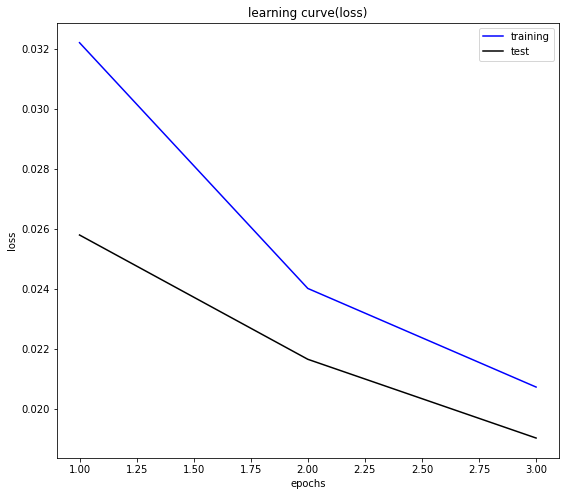

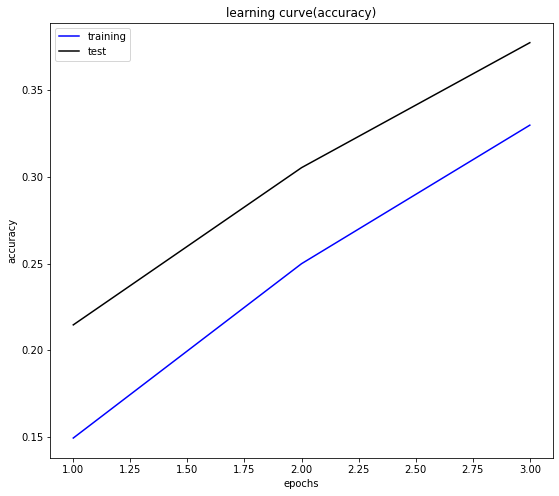

In [ ]:
show_loss_and_accuracy_graph(history)

## **Example 5.18 Show confusion matrix**

In [ ]:
def show_confusion_matrix(net, test_loader, class_names, device):
    from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

    y_pred = []
    y_true = []

    # iterate over test data
    for inputs_test, labels_test in test_loader:
            inputs_test = inputs_test.to(device)
            labels_test = labels_test.to(device)
            
            outputs_test = net(inputs_test)     # prediction(forward calculation)
            prediction_test = torch.max(outputs_test, 1)[1].data.cpu().numpy()  # predected label
            y_pred.extend(prediction_test) # Save Prediction
            
            labels = labels_test.data.cpu().numpy()
            y_true.extend(labels) # Save Truth


    cm = confusion_matrix(y_pred=y_pred, y_true=y_true)
    cmp = ConfusionMatrixDisplay(cm, display_labels=class_names)

    cmp.plot(cmap=plt.cm.Blues)

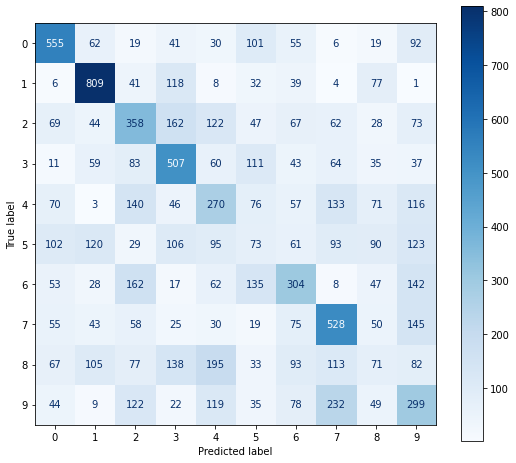

In [ ]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
show_confusion_matrix(net, test_loader, class_names, device)

## **Example 5.19 Show misrecognized images**

In [ ]:
def show_misrecognizd_images(net, test_loader, img_shape, img_cmap, class_names, device):
    count = 0

    # Display 50 images with "correct label : prediction"
    plt.figure(figsize=(15, 10))
    for images, labels in test_loader:
        # obtain predicted labels
        inputs = images.to(device)
        labels = labels.to(device)
        outputs = net(inputs)
        predicted = torch.max(outputs, 1)[1]

        for i in np.arange(images.shape[0]):
            image_np = images[i].numpy().copy() # TensorをNumPyに変換
            label = labels[i]
            pred = predicted[i]
            if (pred != label):
                ax = plt.subplot(5, 10, count+1)
                img = image_np.reshape(img_shape)
                if(len(img_shape) == 3):
                    img = np.transpose(img, (1, 2, 0)) # Change axis order (channel, row, column) -> (row, column, channel)
                img = (img + 1)/2   # 値の範囲を[-1, 1] -> [0, 1]に戻す

                # 結果表示
                plt.imshow(img, cmap=img_cmap)
                ax.set_title(f'{class_names[label]}:{class_names[pred]}')
                ax.get_xaxis().set_visible(False)
                ax.get_yaxis().set_visible(False)
                count += 1
                if count == 50:
                    break
        else:
            continue
        break
            
    plt.show()

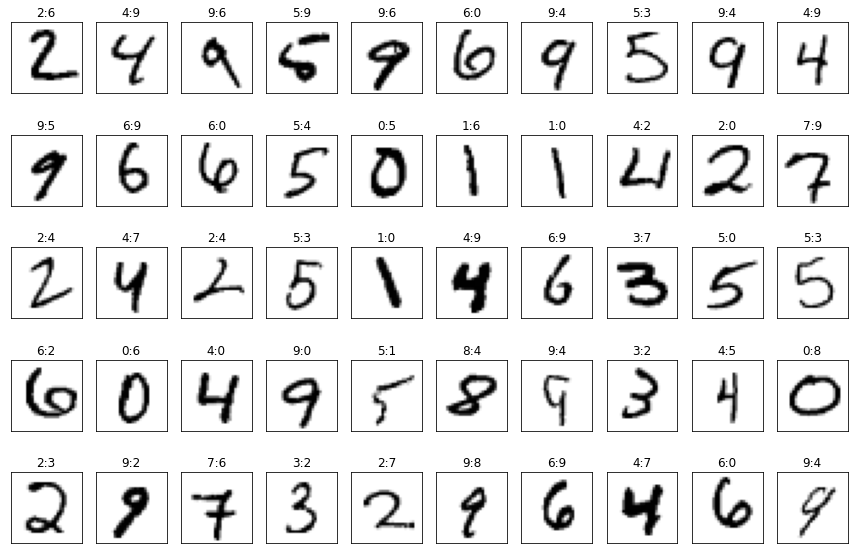

In [ ]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
show_misrecognizd_images(net=net, test_loader=test_loader, img_shape=(28, 28), img_cmap='gray_r', class_names=class_names, device=device)

## 🤔 **Exercise 5.5**

Improve the performance of hand-written number recognition with MNIST dataset in PyTorch. Report the best accuracy and the hyperparameter values at the time.

Accuracy(Test data):

Hyperparameters:
* The number of epoch = 
* Minibatch-size =
* How many layers in the network = 
* How many neurons in each hidden layer =
* learning rate =
* How did you set initial weights and biases =

In [ ]:
batch_size = 5  #minibatch size

# DataLoader for training data (with shuffle)
train_loader = DataLoader( train_set, batch_size = batch_size, shuffle = True)

# DataLoader for test data (without shuffle)
test_loader = DataLoader( test_set,  batch_size = batch_size, shuffle = False)

# 3-layer neural network 
class Model2_updated(nn.Module):
    def __init__(self):
        super().__init__()
        input_size = 784  # input dimension = 784
        hidden_size = 100  # hidden size is a hyper parameter
        output_size = 10  # output dimension = 10 (the number of classes)
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)
        self.mse = nn.Sigmoid()
        # inplace = If set to True, the variable will be overwritten directly to save memory.
        #self.relu = nn.ReLU(inplace=True)　# Use ReLU

        # Initialize weights and biases
        torch.nn.init.normal_(self.linear1.weight, 0.0, 1.0) # mean=0.0, std=1.0
        torch.nn.init.zeros_(self.linear1.bias)
        torch.nn.init.normal_(self.linear2.weight, 0.0, 1.0) # mean=0.0, std=1.0
        torch.nn.init.zeros_(self.linear2.bias)
   
    def forward(self, x):
        p = self.linear1(x)
        y = self.mse(p)
        #y = self.relu(p)
        q = self.linear2(y)
        return q

net = Model2_updated() # make model instance
net = net.to(device) # Send the model to GPU

# Loss: Softmax with Cross-entropy
criterion = nn.CrossEntropyLoss()

# SDG (stochastic gradient descent)
optimizer = optim.SGD(net.parameters(), lr=0.15)  #lr = learning rate

num_epochs = 12    # The number of learning loop
history = np.zeros((0,5)) # For loss and accuracy recording
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [1/12], loss: 0.09808 acc: 0.86368 val_loss: 0.05889, val_acc: 0.91350


  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [2/12], loss: 0.04994 acc: 0.92605 val_loss: 0.04882, val_acc: 0.92760


  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [3/12], loss: 0.03899 acc: 0.94163 val_loss: 0.04358, val_acc: 0.93430


  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [4/12], loss: 0.03219 acc: 0.95090 val_loss: 0.03715, val_acc: 0.94370


  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [5/12], loss: 0.02724 acc: 0.95830 val_loss: 0.03712, val_acc: 0.94680


  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [6/12], loss: 0.02408 acc: 0.96312 val_loss: 0.03487, val_acc: 0.94900


  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [7/12], loss: 0.02057 acc: 0.96887 val_loss: 0.03394, val_acc: 0.94980


  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [8/12], loss: 0.01842 acc: 0.97167 val_loss: 0.03878, val_acc: 0.94530


  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [9/12], loss: 0.01620 acc: 0.97420 val_loss: 0.03715, val_acc: 0.94690


  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [10/12], loss: 0.01454 acc: 0.97777 val_loss: 0.03080, val_acc: 0.95490


  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [11/12], loss: 0.01290 acc: 0.98072 val_loss: 0.03110, val_acc: 0.95620


  0%|          | 0/12000 [00:00<?, ?it/s]

Epoch [12/12], loss: 0.01152 acc: 0.98223 val_loss: 0.03017, val_acc: 0.95830


## 🤔 **Exercise 5.6**

Implement at least two of the techniques introduced in chapter 5. Report your findings and discussion for these technique.

The chapter 5 slide only shows an overview of each technique but does not explain them in detail. Research the details on the Internet.

Recognition accuracy, the speed at which LOSS approaches 0, calculation time should be discussed for example.


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [1/8], loss: 0.01487 acc: 0.55822 val_loss: 0.00805, val_acc: 0.74060


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [2/8], loss: 0.00728 acc: 0.76867 val_loss: 0.00612, val_acc: 0.80920


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [3/8], loss: 0.00595 acc: 0.81275 val_loss: 0.00531, val_acc: 0.83470


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [4/8], loss: 0.00528 acc: 0.83612 val_loss: 0.00486, val_acc: 0.85090


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [5/8], loss: 0.00484 acc: 0.85142 val_loss: 0.00454, val_acc: 0.86220


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [6/8], loss: 0.00453 acc: 0.86195 val_loss: 0.00429, val_acc: 0.86900


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [7/8], loss: 0.00430 acc: 0.87020 val_loss: 0.00412, val_acc: 0.87270


  0%|          | 0/600 [00:00<?, ?it/s]

Epoch [8/8], loss: 0.00410 acc: 0.87635 val_loss: 0.00395, val_acc: 0.88150
Before learning: Loss: 0.00805 Accuracy: 0.74060
After learning : Loss: 0.00395 Accuracy: 0.88150


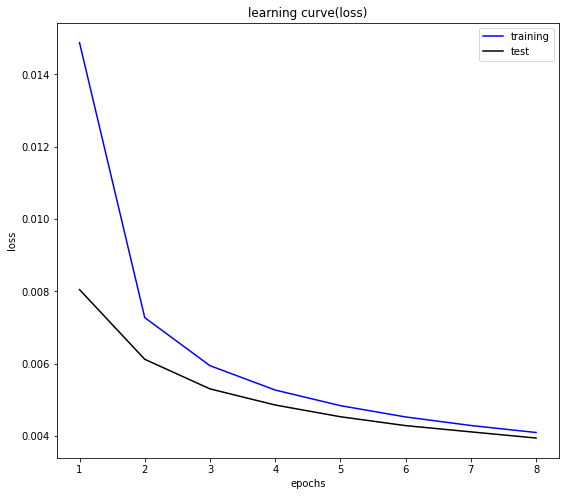

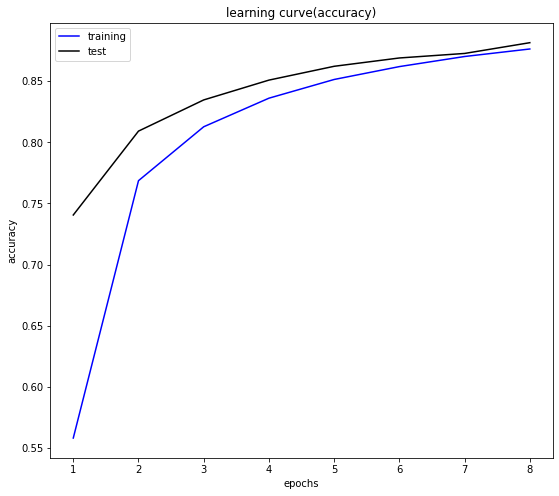

In [ ]:
# without any of the techniques:

batch_size = 100

# DataLoaders for training and test data (with shuffle)
train_loader = DataLoader( train_set, batch_size = batch_size, shuffle = True)
test_loader = DataLoader( test_set,  batch_size = batch_size, shuffle = False)

# 3-layer neural network 
class Model3_1(nn.Module):
    def __init__(self):
        super().__init__()
        input_size = 784  # input dimension = 784
        hidden_size = 40  # hidden size is a hyper parameter
        output_size = 10  # output dimension = 10 (the number of classes)
        self.linear1 = nn.Linear(input_size, hidden_size)
        self.linear2 = nn.Linear(hidden_size, output_size)
        self.mse = nn.Sigmoid()

        # Initialize weights and biases
        torch.nn.init.normal_(self.linear1.weight, 0.0, 1.0) # mean=0.0, std=1.0
        torch.nn.init.zeros_(self.linear1.bias)
        torch.nn.init.normal_(self.linear2.weight, 0.0, 1.0) # mean=0.0, std=1.0
        torch.nn.init.zeros_(self.linear2.bias)
   
    def forward(self, x):
        p = self.linear1(x)
        y = self.mse(p)
        q = self.linear2(y)
        return q

net = Model3_1() # make model instance
net = net.to(device) # Send the model to GPU

# Loss: Softmax with Cross-entropy
criterion = nn.CrossEntropyLoss()

# SDG (stochastic gradient descent)
optimizer = optim.SGD(net.parameters(), lr=0.15)  #lr = learning rate

num_epochs = 8    # The number of learning loop
history = np.zeros((0,5)) # For loss and accuracy recording
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)
show_loss_and_accuracy_graph(history)

---
# **CNN model for MNIST**
---

## **Data preparation (1) load MNIST dataset and preprocessing using Transforms**

In [ ]:
import torchvision.datasets as datasets         # for using MNIST dataset
import torchvision.transforms as transforms     # Transforms

data_root = './data'  # Download destination folder

# preprocessing function (Transforms)
transform2 = transforms.Compose([
    # ToTensor method transforms from PIL Image or numpy.ndarrya to torch.Tensor.
    # It also normalizes from [0, 255] integer values to [0.0, 1.0] float values.
    # see https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html
    transforms.ToTensor(),

    # Normalize from the range of [0, 1] to [-1, 1]
    transforms.Normalize(0.5, 0.5)  # mean=0.5, std=0.5, image = (image - mean) / std
])

# training dataset
train_set = datasets.MNIST(root = data_root, train = True, download = True, transform = transform2)
# test dataset
test_set = datasets.MNIST(root = data_root, train = False, download = True, transform = transform2)

print(train_set.data.shape)
print(test_set.data.shape)

# check the results of transforms
image, label = train_set[0]
print('yype of inputdata: ', type(image))
print('shpae of inputdata: ', image.shape)
print('minimum value: ', image.data.min())
print('maximum value: ', image.data.max())

In [ ]:
from torch.utils.data import DataLoader

batch_size = 100  #minibatch size

# DataLoader for training data (with shuffle)
train_loader = DataLoader( train_set, batch_size = batch_size, shuffle = True)

# DataLoader for test data (without shuffle)
test_loader = DataLoader( test_set,  batch_size = batch_size, shuffle = False) 

In [ ]:
class CNN_Model1(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32,32, 3)
        self.relu = nn.ReLU(inplace=True) # inplace = If set to True, the variable will be overwritten directly to save memory.
        self.maxpool = nn.MaxPool2d((2,2))
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(4608, 128)
        self.l2 = nn.Linear(128, 10)
        
        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool)
        
        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2)
   
    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

net = CNN_Model1()
net = net.to(device) # Send the model to GPU
summary(net, (100,1,28,28), depth=2)

In [ ]:
class CNN_Model2(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(1, 32, 3)
        self.conv2 = nn.Conv2d(32,64, 3)
        self.conv3 = nn.Conv2d(64,64, 3)
        self.relu = nn.ReLU(inplace=True) # inplace = If set to True, the variable will be overwritten directly to save memory.
        self.maxpool = nn.MaxPool2d((2,2))
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(576, 64)
        self.l2 = nn.Linear(64, 10)
        
        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.maxpool,
            self.conv2,
            self.relu,
            self.maxpool,
            self.conv3,
            self.relu)
        
        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2)
   
    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3


net = CNN_Model2()
net = net.to(device) # Send the model to GPU
summary(net, (100,1,28,28), depth=2)

In [ ]:
# Loss: Sortmax with Cross-entropy
criterion = nn.CrossEntropyLoss()

# SDG (stochastic gradient descent)
#optimizer = optim.SGD(net.parameters(), lr=0.01)  # SGD, lr = learning rate
optimizer = optim.Adam(net.parameters(), lr=0.001) # Adam, lr = learning rate

In [ ]:
num_epochs = 3    # The number of learning loop
history = np.zeros((0,5)) # For loss and accuracy recording
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)

In [ ]:
show_loss_and_accuracy_graph(history)

In [ ]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
show_confusion_matrix(net, test_loader, class_names, device)

In [ ]:
class_names = np.array([0,1,2,3,4,5,6,7,8,9])
show_misrecognizd_images(net=net, test_loader=test_loader, img_shape=(28, 28), img_cmap='gray_r', class_names=class_names, device=device)

---
# **CNN model for CIFAR10**
---

In [ ]:
import torchvision.transforms as transforms
import torchvision.datasets as datasets     # for using MNIST dataset

# preprocessing function (Transforms)
transform = transforms.Compose([
    # ToTensor method transforms from PIL Image or numpy.ndarrya to torch.Tensor.
    # It also normalizes from [0, 255] integer values to [0.0, 1.0] float values.
    # see https://pytorch.org/vision/stable/generated/torchvision.transforms.ToTensor.html
    transforms.ToTensor(),

    # Normalize from the range of [0, 1] to [-1, 1]
    transforms.Normalize(0.5, 0.5)  # mean=0.5, std=0.5, image = (image - mean) / std
])

data_root = './data'  # Download destination folder
# training dataset
train_set = datasets.CIFAR10(root = data_root, train = True, download = True, transform = transform)
# test dataset
test_set = datasets.CIFAR10(root = data_root, train = False, download = True, transform = transform)

# check the results of transforms
image, label = train_set[0]
print('yype of inputdata: ', type(image))
print('shpae of inputdata: ', image.shape)
print('minimum value: ', image.data.min())
print('maximum value: ', image.data.max())

In [ ]:
from torch.utils.data import DataLoader

batch_size = 500  #minibatch size

# DataLoader for training data (with shuffle)
train_loader = DataLoader( train_set, batch_size = batch_size, shuffle = True)

# DataLoader for test data (without shuffle)
test_loader = DataLoader( test_set,  batch_size = batch_size, shuffle = False) 

In [ ]:
class CNN3(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1 = nn.Conv2d(3, 32, 3)
        self.conv2 = nn.Conv2d(32,32, 3)
        self.relu = nn.ReLU(inplace=True) # inplace = If set to True, the variable will be overwritten directly to save memory.
        self.maxpool = nn.MaxPool2d((2,2))
        self.flatten = nn.Flatten()
        self.l1 = nn.Linear(6272, 128)
        self.l2 = nn.Linear(128, 10)
        
        self.features = nn.Sequential(
            self.conv1,
            self.relu,
            self.conv2,
            self.relu,
            self.maxpool)
        
        self.classifier = nn.Sequential(
            self.l1,
            self.relu,
            self.l2)
   
    def forward(self, x):
        x1 = self.features(x)
        x2 = self.flatten(x1)
        x3 = self.classifier(x2)
        return x3

In [ ]:
net = CNN3().to(device)

criterion = nn.CrossEntropyLoss()
#optimizer = optim.SGD(net.parameters(), lr=0.01)
optimizer = optim.Adam(net.parameters(), lr=0.001)

num_epochs = 3
history = np.zeros((0,5))
history = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history)


In [ ]:
show_loss_and_accuracy_graph(history)

In [ ]:
class_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
show_confusion_matrix(net, test_loader, class_names, device)

In [ ]:
class_names = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')
show_misrecognizd_images(net=net, test_loader=test_loader, img_shape=(3, 32, 32), img_cmap='viridis', class_names=class_names, device=device)